In [1]:
%matplotlib inline

# Module 5 - Python And Data Analysis

## 學這堂課要幹麻

作為一個研究人員或統計人員，你經常要進行各式數學運算，這些數學運算可能涵蓋從基礎的敘述型統計，到一些比較複雜的最佳化問題、微積分、影像處理等。如何運用電腦來加快處理速度便成為做研究或做分析最基本的議題。

我們可以看到，市面上有非常多與統計相關的軟體，例如非常經典的 Matlab、萬用的 Excel 以及現在非常火紅的 R ，這些工具都能夠幫助你達到科學運算的目標，那為什麼我們不教這些要教 Python 呢？原因大概有以下幾個：

- 軟體免費
- 因為這是 Python 課
- 寫 Python 好像比較有寫程式的感覺
- Python 能夠處理非常多的事情，從架設網頁、撈資料、資料分析整理都可以做
- 多學一點不會吃虧

當然你可能會聽到別人說「xxx 都用 R ，R 好像比較好誒」、「Matlab 功能超強啊」、「Excel 很快誒」之類的，有些人可能會因為這樣開始想「是不是應該先學⋯⋯」，我個人的看法是，工具沒有好壞，當你真正遇到問題的時候你會需要去選擇適當的工具來處理對的問題，我建議你如果想要以科學運算或資料分析為主業的話，最好是**通通都學**，學得越多你就會有越多的解法來解決各式各樣的問題。

這堂課我們將著重在 Python 所提供的幾個非常常見的科學運算工具：NumPy、SciPy 以及 Matplotlib，由於科學計算是一個很廣泛的議題，有非常非常多的領域和不同面向的工具，我們不可能每一個工具都鑽進去介紹，所以這堂課範圍只會涵蓋基本的數據操作，並基於數據操作，帶大家看 Python 如何能夠加快我們運算的速度。

另外在這堂課的最後，將會用兩個非常常見的應用來總結我們的內容，一個是線性回歸預測（採用經典的房價預測範例），另外一個則是喜好推薦系統（推薦你喜歡的音樂），我認為先理解了我們學的東西到底有何應用，學習的過程也就不會這麼痛苦。
    

## 學完這堂課你可以理解

- 如何運用 numpy 操作數據
    - 數據向量化和向量計算
    - 基本的數據操作
- 簡單的敘述統計
    - 資料圖像化，幫助瞭解資料分佈
    - 資料數據分析（平均、中位、標準差...）
    - 相對數量的轉換（z-score、四分位數）
- 一些 SciPy 提供的科學運算套件
- 實例：房價回歸預測與推薦系統

## 教材參考

這份教材有很大一部分參考了 [Scipy lecture notes](http://www.scipy-lectures.org/index.html) 的內容，很多範例也是來自這裡，這份教材寫的比較鉅細彌遺，講了很多細節，建議有興趣的同學可以參考看看。

## 課程大綱

-----

# IPython 環境

還記得 Python 的互動操作環境嗎？在這份教學裡，我們會用比原生的互動環境更強大的 IPython。

IPython 改進了 Python shell 的介面呈現和錯誤回報的格式，並且結合了系統 shell 的一些功能，讓我們在快速測試算法時能夠得心應手。

### IPython 的安裝

在 terminal/cmd 中 `pip install ipython` 就會自動裝好了，但同樣的你要注意一下你裝的是 Python2 還是 Python3 的，在教學中一律使用 Python3 的版本。

安裝完成後在命令環境底下鍵入 `ipython` 即可。

### IPython 的功能

這邊為了畫面簡潔，我把指令都註解掉了，並把輸出放在指令下面。

In [2]:
# 在 function 的最後面打上 ? 可以查詢該 function 的文件
# print?
# ......print 的說明文件 (docstring)

# 運行目錄底下的 Python shell
# %run test.py
# ...test.py 的執行結果

# 命令補完，如果你忘記了某個指令，但記得前面的幾個字，
# 可以用 <tab> 來補完或看看有哪些命令可用
# pri<tab> --變成--> print

# 命令補完也可以用來查詢 object 的可用 method
# np.arra<tab>
# np.array         np.array2string  np.array_equal   np.array_equiv   np.array_repr    np.array_split   np.array_str     

# 查看當前環境下的變數狀況
# %whos
# Variable   Type              Data/Info
# --------------------------------------
# Axes3D     type              <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
# ...

# 計算一段程式碼執行需要花費的時間
# %timeit x = 10
# 10000000 loops, best of 3: 24.4 ns per loop

### Shell 功能

In [3]:
# 列出當前目錄底下的檔案
# ls

# 切換工作目錄
# cd your_dir

# NumPy 數據操作

Numpy 是一套賦予 Python 科學運算能力的重要套件，他強化了 Python 原有的數據操作方法，提供了向量、矩陣等在科學運算上常用的計算模式，並針對許多常用的計算提供了最佳化後的實作，讓 Python 的運算速度大幅提升。

此外，市面上很多的 Python 套件都是基於 numpy 去實作而成，大多數都採用同樣的數據操作方式，只要掌握了 numpy 的使用方式，未來你如果需要學習其他的科學運算套件也會輕鬆很多。

## 安裝 Numpy

同樣使用 pip 我們就可以很快的安裝 numpy 以及相依的套件：

```bash
pip install numpy
```

## Numpy 數據的基本單位：numpy.array

在 Python 裡面有所謂的 list ，能夠一次將大量的資料包裝在同一個容器裡，但在 Python 最初的設計上，list 的主要目的就是「包裝資料」而已，當你需要針對 list 中的資料做處理時，你可能會這樣寫：

In [4]:
data1 = [1, 2, 3, 4, 5]
data2 = [1, 1, 2, 3, 5]

# 相加
result = []
for i in range(len(data1)):
    result.append(data1[i]+data2[i])
print(result)

# 或者簡潔一點
result = [i+j for (i,j) in zip(data1, data2)]
print(result)

[2, 3, 5, 7, 10]
[2, 3, 5, 7, 10]


我們發現到，在 Python 中要對 list 中的資料進行處理，不外乎就是用 forloop 一個一個取出來算，或者用 Python 預先提供的函數來簡化寫法。

當量不多時，這樣的寫法沒什麼問題，但如果我們需要處理大量的資料時（例如十個 list 的相加），會讓我們的程式碼變得繁雜且難以撰寫。

另外在科學計算上我們經常會需要運用向量/矩陣運算，這時候使用 Python list 顯得更加的捉襟見肘，不容易同時維持程式碼簡潔與運算效率。

這時我們就可以使用 Numpy 提供的 Numpy arrays，他跟以往大家在 C 語言中理解的 array 有點類似又有點不同，numpy array 是針對科學計算設計的 Python 類別，他能夠賦予 Python 向量/矩陣/多維度運算的方便性，也強化了運算本身的效率。

接下來我們就來看 numpy array 的基本用法。

In [5]:
import numpy as np # np 是常見的 numpy 縮寫

In [6]:
# Numpy array 可以基於原本的 list 來建立

data1 = np.array([1,2,3,4,5])
data2 = np.array([1,1,2,3,5])
data1, data2

(array([1, 2, 3, 4, 5]), array([1, 1, 2, 3, 5]))

In [7]:
# 方便的運算（向量加法）
result = data1 + data2
result

array([ 2,  3,  5,  7, 10])

In [8]:
# 比較一下運算速度（因為會影響 notebook 撰寫所以註解掉了）
# data1_list = [1,2,3,4,5]
# data2_list = [1,1,2,3,5]
# %timeit [i+j for (i,j) in zip(data1_list, data2_list)]
# %timeit data1+data2

# 在我的電腦上結果分別為（人生中最接近奈米的時候）：
# 1000000 loops, best of 3: 1.19 µs per loop
# 1000000 loops, best of 3: 481 ns per loop

# 備註：1ns = 10^-9 sec, 1µs = 10^-6 sec
# 1 nanosecond(ns) = 0.001 microseconds(µs)

In [9]:
# array 的特性觀察
data1.ndim, data1.shape, len(data1)

(1, (5,), 5)

In [10]:
# 多維度
data3 = np.array([[1,2,3,4,5], [1,1,2,3,5]])
data3, data3.ndim, data3.shape, len(data3)

(array([[1, 2, 3, 4, 5],
        [1, 1, 2, 3, 5]]), 2, (2, 5), 2)

## 常用來製作 array 的方法

在上面我麼製作 array 的方法都是一個一個打出數字，但在科學運算上我們經常會需要製作各式各樣的向量或矩陣，一個一個打其實非常浪費時間，因此 numpy 提供了很多不同的方法來製作 array：

### 依據範圍來建立

In [11]:
a = np.arange(10)  # 一長條
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
b = np.arange(1, 20, 2) # 很像 range 的使用方式，不包括結尾
b

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

### 依據元素點的數量來建立

In [13]:
c = np.linspace(0, 10, 4) # 起始, 結束, 點的數量
c

array([  0.        ,   3.33333333,   6.66666667,  10.        ])

In [14]:
d = np.linspace(0, 1, 5, endpoint=False) # 不包括結尾點
d

array([ 0. ,  0.2,  0.4,  0.6,  0.8])

### 非常常用的各式 arrays （其實可以理解為向量或矩陣了）

In [15]:
all_ones_matrix = np.ones((4, 4)) # <-- 注意裡面的是 tuple
all_ones_matrix

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [16]:
all_ones_vector = np.ones(4)
all_ones_vector

array([ 1.,  1.,  1.,  1.])

In [17]:
all_zeros_matrix = np.zeros((4, 4))
all_zeros_matrix

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [18]:
all_zeros_vector = np.zeros(4)
all_zeros_vector

array([ 0.,  0.,  0.,  0.])

In [19]:
# 對角矩陣
diag_matrix = np.diag(np.array([1,2,3,4,5,6]))
diag_matrix

array([[1, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 6]])

In [20]:
# identity matrix
id_matrix = np.identity(3)
id_matrix

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [21]:
# 跟 identity 非常像的 eye，numpy 裡面有很多函數其實功能很類似或一樣
eye_matrix = np.eye(3)
eye_matrix

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

### 隨機生成

In [22]:
random_nums = np.random.rand(4) # [0, 1]
random_nums

array([ 0.45367238,  0.89779259,  0.39955452,  0.34419709])

In [23]:
# 高斯分佈版，回傳的數列符合高斯分佈（常態分佈）
gaussian_nums = np.random.randn(4)
gaussian_nums

array([ 0.63150576, -1.29804597,  0.34880361, -0.87196759])

### 堆積、重複同一個 array

In [24]:
a = np.arange(4)
a

array([0, 1, 2, 3])

In [25]:
np.tile(a, 2)

array([0, 1, 2, 3, 0, 1, 2, 3])

In [26]:
np.tile(a, (2, 1))  # 2 rows x 1 col

array([[0, 1, 2, 3],
       [0, 1, 2, 3]])

In [27]:
np.tile(a, (3, 2)) # 3 rows x 2 cols

array([[0, 1, 2, 3, 0, 1, 2, 3],
       [0, 1, 2, 3, 0, 1, 2, 3],
       [0, 1, 2, 3, 0, 1, 2, 3]])

## Array 的基本性質

Numpy 跟 Python list 一樣能夠儲存各式各樣的元素，我們可以透過 `dtype` 來檢查或在建立 array 時指定該 array 的性質。

In [28]:
c = np.array([1, 2, 3, 4, 5])
c.dtype

dtype('int64')

In [29]:
d = np.array([.1, .2, .3, .4, .5])
d.dtype

dtype('float64')

In [30]:
e = np.array([1, 2, 3, 4, 5], dtype=float)
e.dtype

dtype('float64')

In [31]:
f = np.array([0, 1, 0, 0, 1, 1], dtype=bool)
f.dtype

dtype('bool')

In [32]:
g = np.array(['hello', 'b', 'cde', 'fghi'])
g.dtype  # 指小於五個 Unicode

dtype('<U5')

## Array 的元素操作：indexing and slicing

Array 的操作方式基本上跟 Python list 類似，也有 slicing 的操作：

In [33]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
a[:3] # 從頭選到...（不含結尾）

array([0, 1, 2])

In [35]:
a[1:5] # 選取範圍（不含結尾）

array([1, 2, 3, 4])

In [36]:
a[1:8:2] # 選取範圍，並根據某個值步進

array([1, 3, 5, 7])

In [37]:
a[8:] # 從 ... 選到結尾

array([8, 9])

In [38]:
a[::2] # 從頭到尾，步進式

array([0, 2, 4, 6, 8])

In [39]:
a[::-1] # 倒著選

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

### Copy 和 view 的概念

如果你記得 C 裡面的指標，就會知道指標跟真實的值是不同的概念，指標是「一個變數的位址」而「值」是變數的內容。

在 numpy 裡面有著類似的概念，當我們透過 slicing & indexing 的方式去「觀察」某一推數據時，有時候我們取得的是 view，如果改變 view 的內容，原本的數據也會被改動。

然而有時候我們取得的是 copy，改變 copy 的內容並不會影響到原本的數據。

這個概念在剛開始接處的時候可能會有點晦澀，但理解這件事情可能可以幫助你避免某些不必要的 bug。

In [40]:
# 建立一個原始 array
original_array = np.arange(10)
original_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
# 從原始 array 中取出某個部份給另外一個 array
another_array = original_array[::2]
another_array

array([0, 2, 4, 6, 8])

In [42]:
# 更改 another_array 的某些內容
another_array[0] = 20
another_array

array([20,  2,  4,  6,  8])

In [43]:
# 觀察原始 array 發生什麼事了
original_array

array([20,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [44]:
# 在上面的範例中我們看到，
# 我們更改 another_array 時，original_array 的內容也被更改了。
# 這表示這兩個 array 其實是「共用一個空間的」，
# another_array 只是 original_array 的一個「view」

# 我們可以透過一個方式來觀察兩個 array 是不是共用空間
np.may_share_memory(original_array, another_array)

# 但注意，這個函數最特殊的地方就是他是「may」，官方文件給了這樣的解釋：
# "A return of True does not necessarily mean that the two arrays share any element. It just means that they might."
# http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.may_share_memory.html

True

In [45]:
# 如果們需要肯定的複製一個 array，可以用這個方法：
the_other_array = original_array[::2].copy()
the_other_array[0] = 100
the_other_array

array([100,   2,   4,   6,   8])

In [46]:
original_array # 注意原本的 array 沒有被更改

array([20,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [47]:
np.may_share_memory(original_array, the_other_array)

False

## 題外話：建立質數 array

這是在我參考的網站上給的一個範例，覺得很有趣，而且展現了 numpy 的一些運算方式，所以節錄在這裡：

In [48]:
is_prime = np.ones((20, ), dtype=bool)
is_prime

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [49]:
is_prime[:2] = 0
is_prime

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [50]:
for i in range(2, int(np.sqrt(len(is_prime)))):
    is_prime[2*i::i] = False
is_prime

array([False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True], dtype=bool)

In [51]:
prime_num_list = []
for i in range(len(is_prime)):
    if is_prime[i]: prime_num_list.append(i)
prime_num_list

[2, 3, 5, 7, 11, 13, 17, 19]

## Numpy array 的運算

接下來我們要看 numpy 的 array 究竟有怎麼樣的運算特色，這些運算可能跟你過去學習的 Python list 有很大的不同，建議同學自行去嘗試看看不同的運算，並檢驗輸出的結果。

在實作時你必須很清楚 np.array 和 list 的運算差異，以免誤用造成奇怪的結果。

In [52]:
# 當我們把 scalar 加上 numpy array (element wise)
my_arr = np.arange(10)
my_arr + 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [53]:
my_arr**2 # Elementwise square

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [54]:
2**(my_arr+1) # A little amazing 

array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])

In [55]:
a = np.arange(4)
b = np.ones(4)
a+b # 必須要是同一個維度

array([ 1.,  2.,  3.,  4.])

In [56]:
a = np.arange(4)
b = np.arange(4)
a*b # 注意，不是向量乘法而是 elementwise 的乘法

array([0, 1, 4, 9])

In [57]:
# 矩陣也是一樣的
a_matrix = np.zeros((4,4))
a_matrix + 5

array([[ 5.,  5.,  5.,  5.],
       [ 5.,  5.,  5.,  5.],
       [ 5.,  5.,  5.,  5.],
       [ 5.,  5.,  5.,  5.]])

In [58]:
# 如果直接把兩個矩陣相乘，結果還是 elementwise 的乘法
a_matrix = np.ones((3, 3))*3
b_matrix = np.ones((3, 3))*2
a_matrix*b_matrix

array([[ 6.,  6.,  6.],
       [ 6.,  6.,  6.],
       [ 6.,  6.,  6.]])

In [59]:
# 如果要矩陣相乘的話
a_matrix.dot(b_matrix)

array([[ 18.,  18.,  18.],
       [ 18.,  18.,  18.],
       [ 18.,  18.,  18.]])

## Numpy array 的邏輯運算

Numpy array 也可以進行一些邏輯運算，非常好用：

In [60]:
a = np.array([1, 2, 3, 4, 5])
a

array([1, 2, 3, 4, 5])

In [61]:
a > 3

array([False, False, False,  True,  True], dtype=bool)

In [62]:
a == 2

array([False,  True, False, False, False], dtype=bool)

In [63]:
b = np.array([1, 2, 5, 6, 5])
b

array([1, 2, 5, 6, 5])

In [64]:
# 一個元素一個元素比
a == b

array([ True,  True, False, False,  True], dtype=bool)

In [65]:
# 整個 array 比
np.array_equal(a, b)

False

In [66]:
# Logical operations
a = np.array([0, 1, 0, 0], dtype=bool)
b = np.array([1, 1, 0, 1], dtype=bool)
np.logical_or(a, b)


array([ True,  True, False,  True], dtype=bool)

In [67]:
np.logical_and(a, b)

array([False,  True, False, False], dtype=bool)

## Array 本身的運算和一些操作

In [68]:
# 全部加起來
a = np.array([1, 2, 3, 4, 5])
np.sum(a)

15

In [69]:
# 矩陣的狀況
x = np.array([[1, 2, 3,], [4, 5, 6]])
np.sum(x)

21

In [70]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [71]:
# 取出第一個 row
x[0, :]

array([1, 2, 3])

In [72]:
# 取出 column
x[:, 1]

array([2, 5])

In [73]:
x.sum(axis=0)  # 從 column 的方向往下疊加

array([5, 7, 9])

In [74]:
x.sum(axis=1) # 從 row 的方向往右疊加

array([ 6, 15])

In [75]:
x.max() # 整個 array 的做大值

6

In [76]:
x.max(axis=0) # 每個 column 的最大值 

array([4, 5, 6])

In [77]:
x.min() # 整個 array 的最小值

1

In [78]:
x.argmin() # 整個 array 中最大數值的 index

0

In [79]:
x.argmax(axis=1) # row 方向上最大數值的 index

array([2, 2])

### 統計相關

In [80]:
x = np.array([1, 1, 2, 3, 5])
y = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

In [81]:
x.mean() # 平均數

2.3999999999999999

In [82]:
y.mean(axis=1) # row 方向上的 mean

array([ 2.5,  6.5])

In [83]:
x.std() # 標準差

1.4966629547095764

In [84]:
y.std(axis=1) # row 方向上的 std

array([ 1.11803399,  1.11803399])

In [85]:
np.median(x) # 中位數

2.0

In [86]:
np.median(y, axis=1) # row 方向上的中位數

array([ 2.5,  6.5])

## 其他運算 functions

In [87]:
a = np.linspace(1, 2*np.pi, 5)
np.sin(a)

array([  8.41470985e-01,   7.31688869e-01,  -4.79425539e-01,
        -9.68912422e-01,  -2.44929360e-16])

In [88]:
np.log(a)

array([ 0.        ,  0.84191037,  1.29242113,  1.60188727,  1.83787707])

In [89]:
np.exp(a)

array([   2.71828183,   10.1837807 ,   38.15255216,  142.93485691,
        535.49165552])

## 排序

In [90]:
a = np.array([1, 5, 7, 6, 2, 3])
a.sort()
a

array([1, 2, 3, 5, 6, 7])

## 矩陣的轉置

In [91]:
a = np.triu(np.ones((3, 3)), 1)
a.T

array([[ 0.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  1.,  0.]])

## 小結

看到這邊你會發現， numpy 提供給我們非常豐富的運算套件和運算方式，目前不用太在意有很多東西你記不起來，只要大概知道有這些東西，要用的時候如果忘了，再去查就好。

# Matplotlib pyplot 繪圖

Matplotlib 是 Python 界被廣泛使用的繪圖套件，他提供了各式各樣的繪圖方式以及非常高度的客製化方法，你幾乎可以只用 matplotlib 就製作出各種你想要的圖。

然而 matplotlib 為了維持他的彈性，他有非常多可以調整的參數，我們希望同學能夠學習 matplotlib 的基本概念和基本的使用方法，因此盡量簡化參數調整的部分。

未來同學如果有需要可以到 matplotlib 的官方文件中查詢怎麼樣使用不同的參數來製作自己想要的圖。

## 安裝方式

```bash
$ pip install matplotlib
```

在啟動你的 ipython 時加上參數 `--matplotlib` ，這讓你在畫圖時不會「卡住」。

```bash
$ ipython --matplotlib
```

>如果出現 ValueError: unknown locale: UTF-8 的話，請先鍵入下面兩行：
```bash
export LC_ALL=en_US.UTF-8
export LANG=en_US.UTF-8
```

## 最簡單的圖畫

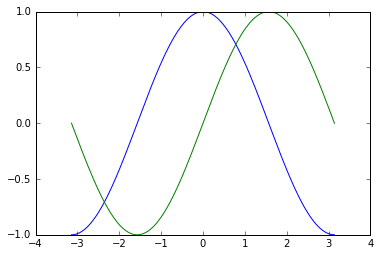

In [92]:
from matplotlib import pyplot as plt # 從 matplotlib 中 import pyplot
import numpy as np

# 畫出 Sin 跟 Cos 曲線

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# .plot 第一個就是 X 軸，第二個則是 Y 軸

plt.plot(X, C)
plt.plot(X, S)

plt.show()

## 修改圖畫的樣式

最基本的同行可以滿足我們很多的需求，但有的時候我們會想讓我們的圖更漂亮，或者依據不同的需求去更改。

Pyplot 的參數非常非常的多，你可以到 [這裡](http://matplotlib.org/users/customizing.html) 去找你需要的參數。

## 畫布大小與線條樣式

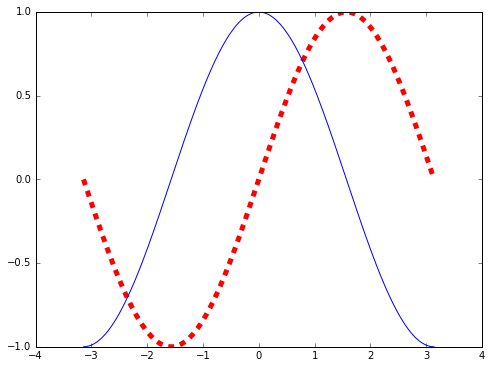

In [93]:
# 首先我們可以定義畫布的大小

plt.figure(figsize=(8, 6), dpi=80) # 我要 8x6 inches 且 dpi 為 80 的畫布

# 跟第一個範例相同的輸入

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# 先把 Sine 畫上去，設定線條顏色為紅色，線寬 5.0，線條樣式為 --

plt.plot(X, S, color="red", linewidth=5.0, linestyle="--")

# 再把 Cosine 畫上去

plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")


# 顯示出圖（如果你沒有用 --matplotlib 啟動 ipython 的話就要特別加上這個）

plt.show()

### 改變數值顯示的範圍和數值的間隔

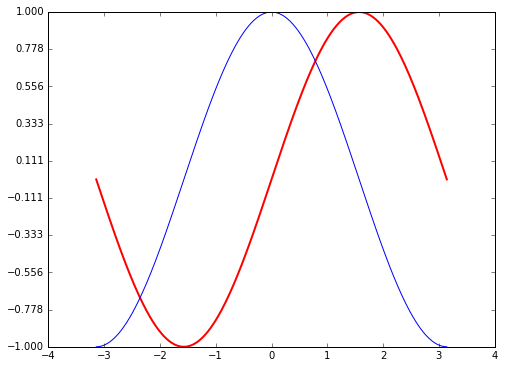

In [94]:
plt.figure(figsize=(8, 6), dpi=80) # 我要 8x6 inches 且 dpi 為 80 的畫布

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, S, color="red", linewidth=2.0, linestyle="-")
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# 設定 X 數值的範圍

plt.xlim(-4.0, 4.0)

# 設定 X 數值的間隔（裡面的參數是一個 np.array）

plt.xticks(np.linspace(-4, 4, 9, endpoint=True))

# 設定 Y 數值的範圍

plt.ylim(-1.0, 1.0)

# 設定 Y 數值的間隔

plt.yticks(np.linspace(-1, 1, 10, endpoint=True))

plt.show()

### 移動「軸」

在這裡我們會看到怎麼樣移動「軸」以及改變軸的樣式：

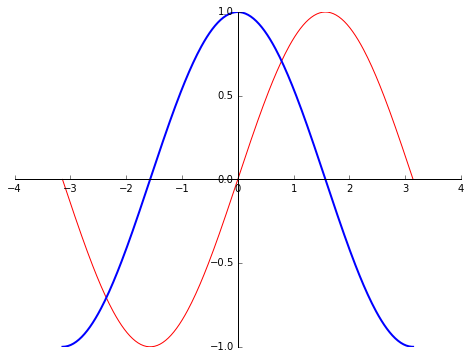

In [95]:
plt.figure(figsize=(8,6), dpi=80)

# 取出目前圖畫中的軸

ax = plt.gca() # get current axis

# 讓右邊的軸和上面的軸消失（color = none）

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 把 X 軸跟 Y 軸的 ticks 移動到下方和左方（你可以試著不打這兩行看看圖會長怎樣）

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# 把底軸跟左軸移動到「資料」的位置

ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

# 把線畫上去

plt.plot(X, S, color="red", linewidth=1.0)
plt.plot(X, C, color="blue", linewidth=2.0)

plt.show()

# 更多可以看這裡：
# http://matplotlib.org/api/spines_api.html#matplotlib.spines.Spine.set_position

### Adding a legend

一個圖，當然要有對應的「圖說」，來說明不同顏色的軸是什麼東西：

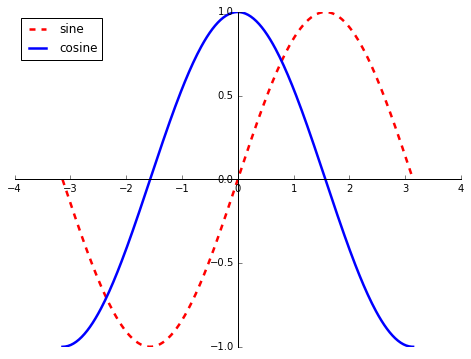

In [96]:
plt.figure(figsize=(8,6), dpi=80)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

# 在畫線的時候加上 label 來辨識不同的線

plt.plot(X, S, color="red", linewidth=2.5, linestyle="--", label="sine")
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")

# 把圖說塞在左上角，會根據 label 的內容自動產生

plt.legend(loc="upper left")

plt.show()

### 有時候可能會想要標示某些點

這個範例稍微複雜了一點，建議大家可以一行一行試，並且一個參數一個參數改，看看圖會有怎麼樣的變化：

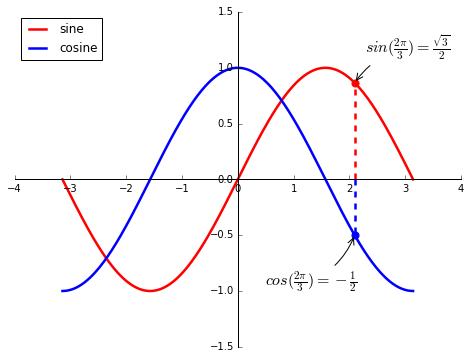

In [97]:
# ======= Previous works... =======

plt.figure(figsize=(8, 6), dpi=80)

plt.plot(X, S, color="red", linewidth=2.5, linestyle="-", label="sine")
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")

plt.legend(loc="upper left")

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

# ====== 以上都是之前講的 =======

# 我們想要標示 2/3 pi 上面的點

t = 2 * np.pi / 3

# 以下開始標示 Sine 線上的某一個點

## 畫上 垂直線（ (t, 0) 和 (t, sin(t)) 這兩個點連線 ）

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")

## 畫上 那個點 (t, sin(t))（這個也可以拿來畫散佈圖，最下面有範例）

plt.scatter([t, ],[np.sin(t), ], 50, color='red')

## 畫上 說明文字（第一個參數裡面使用了 latex 來描述數學式）

plt.annotate(r"$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$",
            xy=(t, np.sin(t)), xycoords="data",
            xytext=(+10, +30), textcoords="offset points", fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.2"))

# 以下開始標示 Cosine 線上的某一個點

plt.plot([t,t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color="blue")

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.show()

## Figures and subplots

在前面的範例中，我們用 `plt.figure(figsize=(8, 6), dpi=80)` 來改變畫布的一些設定，**figure** 即指整個看得見的視窗，預設會使用編號為 1 的 figure （你也可以指定使用很多個不同的 figures）。

在 pyplot 中還有另外一個 **subplots** 的概念，他是指一個畫布上的子圖，以下是範例：

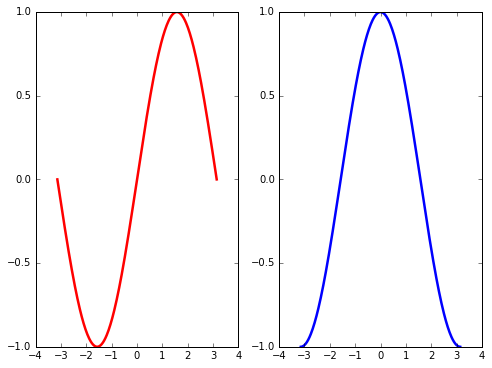

In [98]:
X = np.linspace(-np.pi, np.pi, 256)
S, C = np.sin(X), np.cos(X)

plt.figure(figsize=(8, 6), dpi=80)

# 指定子圖 1, 2, 1 (意指把圖分割成 1 row x 2 cols 的 grid，並使用編號 1 的子圖)

plt.subplot(1, 2, 1)

plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")

plt.subplot(1, 2, 2)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")

plt.show()

## 其他種類的圖

### Scatter plots

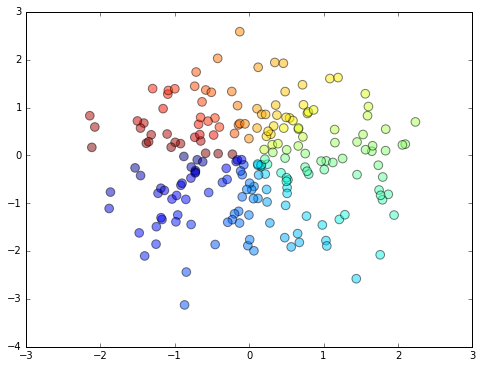

In [99]:
n = 200
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y, X)

plt.figure(figsize=(8,6), dpi=80)

# s = size, c = color

plt.scatter(X, Y, s=75, c=T, alpha=0.5)

plt.show()

### Bar plots

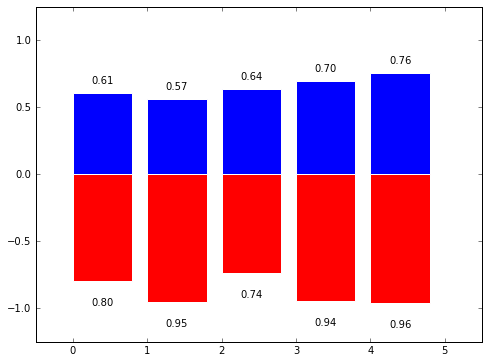

In [100]:
n = 5
X = np.arange(n)
Y1 = np.random.uniform(0.5, 1.0, n)
Y2 = np.random.uniform(0.5, 1.0, n)

plt.figure(figsize=(8,6), dpi=80)

plt.bar(X, +Y1, facecolor="blue", edgecolor="white")
plt.bar(X, -Y2, facecolor="red", edgecolor="white")

# ha=horizontal align, va=vertical align
# plt.text(x-pos, y-pos, text)

for x, y in zip(X, Y1):
    plt.text(x+0.4, y+0.05, "%.2f" % y, ha="center", va="bottom")
for x, y in zip(X, Y2):
    plt.text(x+0.4, -y-0.2, "%.2f" % y, ha="center", va="bottom")
    
plt.ylim(-1.25, +1.25)
plt.xlim(-0.5, 5.5)

plt.show()

### Contour plots

我不太確定這個中文叫什麼，以前我們經常在地理課本上看到。

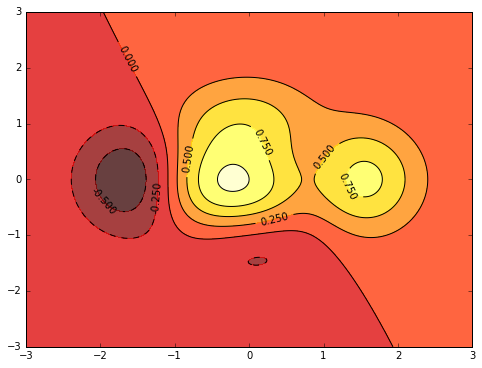

In [101]:
# ------ Prepare data ------
def f(x, y):
    return (1-x/2+x**5+y**3) * np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

X, Y = np.meshgrid(x, y) # Return coordinate matrices from coordinate vectors


# ----- plot below ------

plt.figure(figsize=(8, 6), dpi=80)

# 畫出 contour plot

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap="hot")


# 顯示數值線和數值標籤

C = plt.contour(X, Y, f(X, Y), 8, colors="black", linewidth=.5)
plt.clabel(C)

plt.show()

### 3D plots

3D 圖一直都是個很有趣的東西，我們需要用另外的套件來畫 3D 圖，在 [這裡](http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) 有詳細的教學。

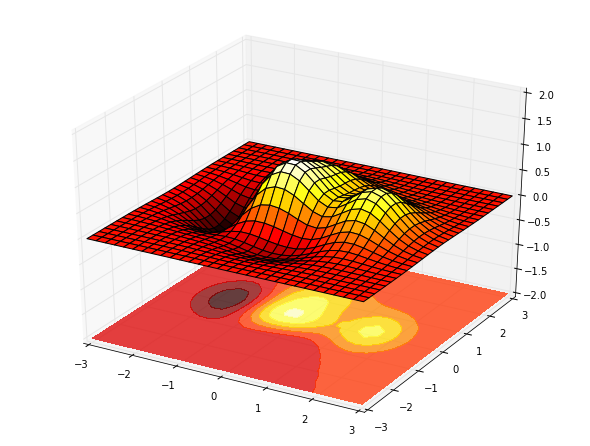

In [102]:
from mpl_toolkits.mplot3d import Axes3D # 需要使用其他的套件

def f(x, y):
    return (1-x/2+x**5+y**3) * np.exp(-x**2-y**2)

n = 30
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)

X, Y = np.meshgrid(x, y) # Return coordinate matrices from coordinate vectors


# ----- plot below -----

fig = plt.figure(figsize=(8, 6), dpi=80)

ax = Axes3D(fig)  # 把畫布變成 3D 的，並取出軸

# 畫上 3D 圖形, 
# (X, Y, Z)

# 可以自己調調這些參數值，看看出來的結果會怎麼樣變化
# rstride = size of array row stride 1~10
# cstride = size of array col stride 1~10
ax.plot_surface(X, Y, f(X,Y), rstride=1, cstride=1, cmap="hot")

# 畫上 contour 圖（與上一個圖相同，但使用 .countourf 這一個 function）

ax.contourf(X, Y, f(X,Y), zdir='z', offset=-2, alpha=.75, cmap="hot")
ax.set_zlim(-2, 2)

plt.show()

## References
[Scipy lecture notes: 1.4. Matplotlib: plotting](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)

## Summary

Matplotlib 是一個功能非常強大的圖畫工具，但是但是，他實在是太複雜了......你可能會需要一段時間來習慣怎麼用 matplotlib 來繪圖。

Matplotlib 畫出來的圖是有一點「原始」（用起來也很原始），Python 中也有一些其他基於 matplotlib 的繪圖套件，並且不需要調教一堆參數就能夠畫出比較「美」的圖，例如 [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/)。

# Scipy Python 科學運算套件

介紹完 numpy 和 matplotlib，我們終於要進入 scipy 的世界了（這是個漫長的過程...）。

Scipy 簡單來說是一個「能夠處理許多領域、不同面向科學運算需求的工具箱」，這邊介紹幾個面像：

- 線性代數（`scipy.linalg`）
- 快速傅立葉轉換（`scipy.fftpack`）
- 最佳化問題（`scipy.optimize`）
- 統計運算（`scipy.stats`）
- 訊號處理（`scipy.signal`）
- 影像處理（`scipy.ndimage`）
- ......

你基本上不需要全部都會（有很多我也沒看過是什麼...），依照你的需求去選擇你會用到的，~~然後看著文件抄~~。

因為 scipy 不是通用的概念（像 numpy 和 matplotlib 這麼通用），在這份教學中我們會直接使用範例來套用 scipy 裡面的功能，讓大家了解到這些東西是怎麼樣應用到實際的問題上。


## 經典範例演練：線性回歸預測房價

我們能不能根據一個城市的人口數來預測房價的狀況？

這是一個很經典的線性回歸（linear regression）問題，資料檔來自於 Coursera Machine Learning 第一週的作業。

首先我們把資料檔讀入 Python 中，使用 numpy 的函式來讀取資料：

In [103]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy import stats

# Load data (which is .txt format)

data = np.loadtxt('ex1data1.txt', delimiter=',')

# See what it is (the first 5 rows)
# 第一欄：人口數，第二欄：房價

data[:5, :]

array([[  6.1101,  17.592 ],
       [  5.5277,   9.1302],
       [  8.5186,  13.662 ],
       [  7.0032,  11.854 ],
       [  5.8598,   6.8233]])

###  觀察資料

在取得資料後，第一件事就是看一下資料長得什麼樣子：

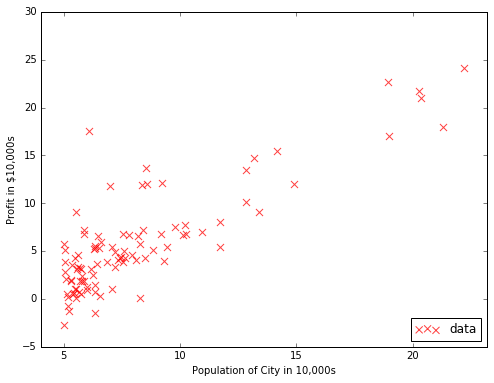

In [104]:
# Prepare the data

X = data[:, 0]  # Population
y = data[:, 1]  # Profit

# Plot the data

plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(X, y, s=50, c='red', alpha=0.75, marker='x', label="data")
plt.xlim(X.min()-1, X.max()+1)

# Add labels

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

plt.legend(loc="lower right")

plt.show()

### Hypothesis and cost function

接下來我們要使用最簡單的線性回歸來找出這些資料的模型，我們的 hypothesis function, h(x) 和 cost function, J(x) 的定義如下：

$$h(x)=\theta^Tx=\theta_{0}+\theta_{1}x_{1}$$
$$J(x)=\frac{1}{2m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})^2$$

In [105]:
# Prepare our data for optimization

m = X.shape[0] # Number of data rows
theta = np.zeros(1+X.ndim) # Init theta
X_ones = np.c_[np.ones(m), X] # 塞一個都是 1 的 column 進 X

# Define cost_func and init theta

def cost_func(thata, X, y):
    """ Compute the cost of our model
        
        Example:
        >>> cost_func(theta, X_ones, y)
    """
    m = X.shape[0]
    return ((X.dot(theta)-y).dot(X.dot(theta)-y)) / (2*m)

cost_func(theta, X_ones, y)

32.072733877455669

### Gradient descent 梯度下降法（原始版）

到這邊我們可以發現，參數 theta = 0, 0 時 cost 為 32 左右，接下來我們使用手動的 gradient descent （梯度下降）的方式來最小化我們的 cost function ，這邊給出我們 cost function 的偏微分後結果（ $\alpha$ 為 learning rate ）：

$$\alpha\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})x_{j}^{(i)}$$

In [106]:
# 定義 gradient descent 的偏微分函數

def grad_func(X, y, theta, alpha):
    """ Compute the gradient of our cost_func
        
        Example:
        >>> grad_func(X_ones, y, theta, alpha)
    """
    m = X.shape[0]
    return (X.T.dot(X.dot(theta)-y)) * (alpha / m)

# 設定初始參數

theta = np.zeros(X_ones.ndim)
alpha = 0.001
max_iteration = 5000

# 進行 gradient descent

for i in range(max_iteration):
    new_theta = theta - grad_func(X_ones, y, theta, alpha)
    theta = new_theta.copy()
    
# 輸出預測的參數值

print("Our optimized theta are {th}".format(th=str(theta)))

Our optimized theta are [-2.28168607  1.03088031]


### 畫出結果

現在我們已經透過 gradient descent 找出了最佳的參數值，接著嘗試將這條線和原本的 data 畫在同一張圖上：

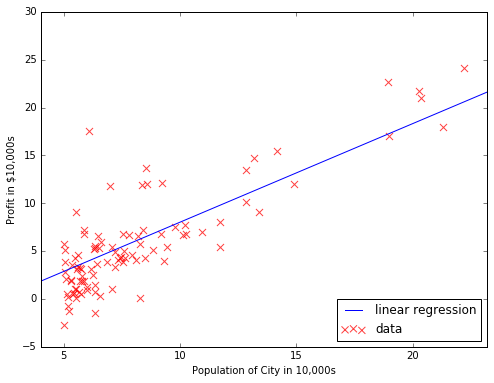

In [107]:
# Now we have an optimized theta, lets plot it

plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(X, y, s=50, c='red', alpha=0.75, marker='x', label="data")
plt.xlim(X.min()-1, X.max()+1)

# Add labels

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

# Plot our regression line

px = np.arange(0, 25)
py = theta[0] + (theta[1]*px)

plt.plot(px, py, label="linear regression")

plt.legend(loc="lower right")

plt.show()

### scipy.stats 內的線性回歸

到這邊我們已經看過怎麼樣自己土炮一個線性回歸，接下來我們嘗試使用 scipy 中的線性回歸函數來找到這一條線：

In [108]:
# ===== Find linear regression with scipy.stats =====

res = stats.linregress(X, y)
slope = res.slope
intercept = res.intercept

# 會得出斜率和截距

slope, intercept

(1.1930336441895935, -3.8957808783118502)

有了斜率與截距後，我們試著將 scipy 給我們的結果和我們自己土炮出來的結果畫在一起：

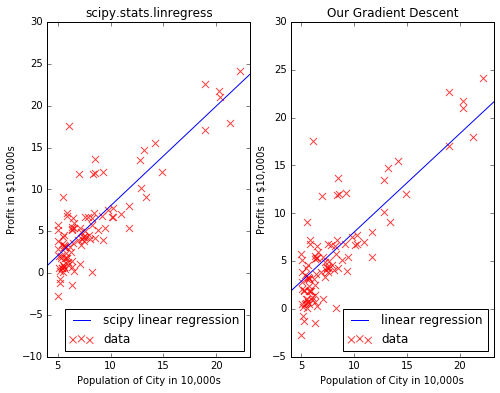

In [109]:
# Plot the result

plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 2, 1)
plt.title("scipy.stats.linregress")

plt.scatter(X, y, s=50, c='red', alpha=0.75, marker='x', label="data")
plt.xlim(X.min()-1, X.max()+1)

# Add labels

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

# Plot the line

px_s = np.arange(0, 25)
py_s = slope*px_s + intercept

plt.plot(px_s, py_s, label="scipy linear regression")

# Legend

plt.legend(loc="lower right")


# ===== Plot linear regression from gradient descent =====

plt.subplot(1, 2, 2)
plt.title("Our Gradient Descent")

plt.scatter(X, y, s=50, c='red', alpha=0.75, marker='x', label="data")
plt.xlim(X.min()-1, X.max()+1)

# Add labels

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

# Plot our regression line

px = np.arange(0, 25)
py = theta[0] + (theta[1]*px)

plt.plot(px, py, label="linear regression")

plt.legend(loc="lower right")


plt.show()

## 路邊範例演練：土炮推薦算法

# 延伸閱讀

因為我個人比較熟悉的領域都是跟機器學習比較相關的，所以閱讀滿多都是跟 ML 有關的文章。

這裡面某些文章是在探討數學模型，有些則是直接應用數學模型，建議同學可以先約略了解數學模型的概念，接著直接去應用那些方法，先理解了這些方法能夠達到什麼效果之後，有興趣的同學可以再去理解模型背後的數學過程或意義（當然你要先了解基本的線性代數與微積分，也不要怕看數學式）。

## [Numpy Array Broadcasting](http://www.scipy-lectures.org/intro/numpy/operations.html#broadcasting)

這是 numpy array 在運算的時候的小細節，但滿重要的。

## [Seaborn: statistical data visualization](https://stanford.edu/~mwaskom/software/seaborn/)

基於 matplotlib 的高階繪圖套件，之後網研社可能會講這個。

## ["People Who Like This Also Like ... " ](http://www.benfrederickson.com/distance-metrics/)

介紹推薦算法。

## [矩阵分解在推荐系统中的应用：NMF和经典SVD实战](http://www.letiantian.me/2015-05-25-nmf-svd-recommend/)

線性代數到底怎麼樣應用在實際問題上，這是一個很好的範例（如果我早一點知道這個應該就不會亂學了吧 ˊ_>ˋ）

## [机器学习中的数学(1)-回归(regression)、梯度下降(gradient descent)](http://www.cnblogs.com/LeftNotEasy/archive/2010/12/05/mathmatic_in_machine_learning_1_regression_and_gradient_descent.html)

這個系列文章帶我們看了 ML 裡面的一些數學議題，並提到了 ML 的一些觀念，我覺得挺好的。